<div style = "text-align:center" >
<hr>
    <b> <a> Trabajo de investigacion FINAL </a> </b>
<hr>
</div>

In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import yfinance as yf 
import warnings
import datetime as dt
import time
import os
import scipy.optimize as sco
import imageio
from IPython.display import display, Image
import io
warnings.filterwarnings("ignore")

In [2]:
ruta_del_indice = f'00-Archivos_csv/sp500_companies.csv'
ticker_tradicionales = pd.read_csv(ruta_del_indice)
ticker_tradicionales = ticker_tradicionales.Symbol.tolist()
print(len(ticker_tradicionales))
print(ticker_tradicionales)

501
['AAPL', 'NVDA', 'MSFT', 'GOOGL', 'AMZN', 'META', 'BRK-B', 'AVGO', 'LLY', 'TSLA', 'WMT', 'JPM', 'UNH', 'XOM', 'V', 'ORCL', 'MA', 'HD', 'PG', 'COST', 'JNJ', 'ABBV', 'NFLX', 'BAC', 'KO', 'CRM', 'MRK', 'CVX', 'AMD', 'TMUS', 'PEP', 'TMO', 'ACN', 'LIN', 'ADBE', 'MCD', 'IBM', 'CSCO', 'GE', 'ABT', 'WFC', 'NOW', 'DHR', 'CAT', 'AXP', 'QCOM', 'PM', 'TXN', 'BX', 'VZ', 'MS', 'INTU', 'AMGN', 'ISRG', 'DIS', 'AMAT', 'NEE', 'PFE', 'UBER', 'RTX', 'SPGI', 'CMCSA', 'GS', 'LOW', 'T', 'PGR', 'UNP', 'BKNG', 'LMT', 'BLK', 'HON', 'SYK', 'ETN', 'COP', 'ANET', 'TJX', 'BSX', 'VRTX', 'KKR', 'NKE', 'SCHW', 'C', 'PANW', 'MU', 'ADP', 'CB', 'ADI', 'ELV', 'MDT', 'UPS', 'DE', 'REGN', 'MMC', 'PLD', 'FI', 'KLAC', 'SBUX', 'LRCX', 'BMY', 'GILD', 'AMT', 'HCA', 'INTC', 'CI', 'PLTR', 'SO', 'MDLZ', 'SHW', 'ICE', 'BA', 'TT', 'DELL', 'DUK', 'ZTS', 'MCO', 'WM', 'MO', 'CVS', 'ABNB', 'CTAS', 'EQIX', 'CEG', 'SNPS', 'GD', 'PH', 'CL', 'PYPL', 'CMG', 'CME', 'APH', 'MSI', 'CRWD', 'NOC', 'CDNS', 'AON', 'TDG', 'ITW', 'WELL', 'EOG', 'C

In [3]:
def funcion_fechas(ruta,inicio,cierre):
    fechas_memoria = [inicio,cierre]
    fechas_memoria = pd.DataFrame(fechas_memoria)
    fechas_memoria.to_csv(ruta, index = False)

<div style = "text-align:center" >
<hr>
    <b>  Se define la ubicación de los datos a utilizar  </b>
<hr>
</div>

In [4]:
start = dt.date.fromisoformat('2015-01-01')
end = dt.date.fromisoformat('2024-10-01')

ruta_fechas = f'00-Archivos_csv/fechas_memoria.csv'
ruta_A = f'00-Archivos_csv/Tickers_csv'
lista_fechas = []
ticker_mixto = ticker_tradicionales + ['BTC-USD']

if os.path.isfile(ruta_fechas):
    fechas_memoria_leida = pd.read_csv(ruta_fechas)
else:
    funcion_fechas(ruta_fechas,start,end)
    
for i in ticker_mixto:
    ticker_archivo = f'{ruta_A}/{i}.csv'        ##me concantena la ruta
    if os.path.isfile(ticker_archivo):
        print(f"El Ticker {i} existe en el directorio, por lo tanto no se va a volver a descargar")
        data_i = pd.read_csv(ticker_archivo)
        if pd.to_datetime(fechas_memoria_leida.iloc[0,0]).date() == start:
            print(f"Fecha de inicio coincidente para {i}")
        else:
            print(f"Fecha de inicio NO coincidente para {i}, {fechas_memoria_leida.iloc[0,0]}")
            data_i = yf.download(i, start = start, end = end)[['Adj Close', 'Volume']]
            ticker_archivo = f'{ruta_A}/{i}.csv'
            data_i.to_csv(ticker_archivo)
        if pd.to_datetime(fechas_memoria_leida.iloc[1,0]).date() == end:                   
            print(f"Fecha de cierre coincidente para {i}")
        else:
            print(f"Fecha de cierre NO coincidente para {i}")
            data_i = yf.download(i, start = start, end = end)[['Adj Close', 'Volume']]
            ticker_archivo = f'{ruta_A}/{i}.csv'
            data_i.to_csv(ticker_archivo)
    else:
        data_i = yf.download(i, start = start, end = end)[['Adj Close', 'Volume']]
        ticker_archivo = f'{ruta_A}/{i}.csv'
        data_i.to_csv(ticker_archivo)
funcion_fechas(ruta_fechas,start,end)

El Ticker AAPL existe en el directorio, por lo tanto no se va a volver a descargar
Fecha de inicio coincidente para AAPL
Fecha de cierre coincidente para AAPL
El Ticker NVDA existe en el directorio, por lo tanto no se va a volver a descargar
Fecha de inicio coincidente para NVDA
Fecha de cierre coincidente para NVDA
El Ticker MSFT existe en el directorio, por lo tanto no se va a volver a descargar
Fecha de inicio coincidente para MSFT
Fecha de cierre coincidente para MSFT
El Ticker GOOGL existe en el directorio, por lo tanto no se va a volver a descargar
Fecha de inicio coincidente para GOOGL
Fecha de cierre coincidente para GOOGL
El Ticker AMZN existe en el directorio, por lo tanto no se va a volver a descargar
Fecha de inicio coincidente para AMZN
Fecha de cierre coincidente para AMZN
El Ticker META existe en el directorio, por lo tanto no se va a volver a descargar
Fecha de inicio coincidente para META
Fecha de cierre coincidente para META
El Ticker BRK-B existe en el directorio, po

<div style = "text-align:center" >
<hr>
    <b>  Dataframes con volumen y precios de cada ticker  </b>
<hr>
</div>

In [5]:
data_total_volumen = pd.DataFrame()                     ##Se crean los dataframes para luego concatenar cada microdataframe de cada ticker en un unico df.
data_total_precios = pd.DataFrame()
for i in range(len(ticker_tradicionales)):
    ##print(f"Se está trabajando sobre el ticker: {ticker_tradicionales[i]}")
    data_i = pd.read_csv(f'{ruta_A}/{ticker_tradicionales[i]}.csv')
    data_i['Date'] = pd.to_datetime(data_i['Date'])
    data_i = data_i.set_index('Date')
    
    data_i_volumenes_vol = data_i[['Volume']].rename(columns={'Volume': ticker_tradicionales[i]})
    data_i_precios = data_i[['Adj Close']].rename(columns={'Adj Close': ticker_tradicionales[i]})
    
    data_total_volumen = pd.concat([data_total_volumen, data_i_volumenes_vol], axis = 1)
    data_total_precios = pd.concat([data_total_precios, data_i_precios], axis = 1)

<div style = "text-align:center" >
<hr>
    <b>  Almacenamiento de los 10 tickers con mayor volumen POR TRIMESTRE </b>
<hr>
</div>

In [6]:
data_total_volumen['Trimestre'] = data_total_volumen.index.to_period('Q')                 #No lo hacemos con .index.quarter xq te pone solo el quarter y no el año, neceistamos el año
trimestres_totales = data_total_volumen['Trimestre'].astype(str).unique().tolist()          ##Pasarlo a string asi no hay problema con doble elemento a la hora de crear la lista

len(trimestres_totales)         ##Necesito 35 listas que almacenan en total unos 10 tickers, que se supone que son los que mas volumen tienen.
####data_total_volumen.loc['2016Q2':'2016Q2'].iloc[:,:-1].sum().nlargest(10)        Imprimir esto x si se olvida la mecanica
volumen_mas_alto_trimestre =[]          ##Esta lista tiene una lista de 35 espacios (cada espacio es un activo) en la que se encuentran los 10 tickers con el acumulado de volumen mayor para ese trimestre
for i in range(len(trimestres_totales)):
    volumen_i = data_total_volumen.loc[trimestres_totales[i]:trimestres_totales[i]].iloc[:,:-1].sum().nlargest(10)      ##Esto es para que sume todos los volumenes de forma vertical, PERO que omita la columna que tiene los quarters, que es la ultima y que a su vez solo se quede con los activos que mayor volumen tienen con el nlargets(10)
    volumen_mas_alto_trimestre.append(volumen_i)
volumen_mas_alto_trimestre      ##En cada espacio tiene una lista a su vez, la cual almacena los 10 activos que mayor volumen experimentaron en ese preciso trimestre. Para cada espacio de la principal nos quedamos con los 10 tickers, que son los que mas volumen tuvieron.

[NVDA     1.564434e+10
 AAPL     1.432176e+10
 BAC      5.977361e+09
 TSLA     4.798690e+09
 AMZN     4.588122e+09
 GOOGL    2.729456e+09
 MSFT     2.399812e+09
 T        2.137685e+09
 INTC     2.057162e+09
 PFE      1.958767e+09
 dtype: float64,
 NVDA     2.008882e+10
 AAPL     1.131558e+10
 BAC      4.527480e+09
 AMZN     3.827506e+09
 TSLA     3.803190e+09
 T        2.629332e+09
 GOOGL    2.227662e+09
 MSFT     2.172462e+09
 CMCSA    2.080797e+09
 AVGO     2.004171e+09
 dtype: float64,
 NVDA     2.143010e+10
 AAPL     1.548659e+10
 BAC      5.711021e+09
 AMZN     5.234042e+09
 TSLA     4.134198e+09
 GOOGL    3.349304e+09
 T        2.710410e+09
 FCX      2.486382e+09
 AVGO     2.351611e+09
 INTC     2.216980e+09
 dtype: float64,
 NVDA     2.102430e+10
 AAPL     1.114027e+10
 AMZN     5.492370e+09
 BAC      5.059481e+09
 CMG      4.077355e+09
 TSLA     3.587188e+09
 GOOGL    2.629462e+09
 FCX      2.485543e+09
 WMT      2.396320e+09
 PFE      2.392455e+09
 dtype: float64,
 NVDA     2.

In [7]:
trimestres_totales

['2015Q1',
 '2015Q2',
 '2015Q3',
 '2015Q4',
 '2016Q1',
 '2016Q2',
 '2016Q3',
 '2016Q4',
 '2017Q1',
 '2017Q2',
 '2017Q3',
 '2017Q4',
 '2018Q1',
 '2018Q2',
 '2018Q3',
 '2018Q4',
 '2019Q1',
 '2019Q2',
 '2019Q3',
 '2019Q4',
 '2020Q1',
 '2020Q2',
 '2020Q3',
 '2020Q4',
 '2021Q1',
 '2021Q2',
 '2021Q3',
 '2021Q4',
 '2022Q1',
 '2022Q2',
 '2022Q3',
 '2022Q4',
 '2023Q1',
 '2023Q2',
 '2023Q3',
 '2023Q4',
 '2024Q1',
 '2024Q2',
 '2024Q3']

In [8]:
len(volumen_mas_alto_trimestre), len(trimestres_totales)

(39, 39)

In [9]:
volumen_mas_alto_trimestre[38],trimestres_totales[37],pd.Period(trimestres_totales[38], freq='Q').start_time - pd.DateOffset(years = 1)

(NVDA    2.078302e+10
 TSLA    6.175761e+09
 INTC    5.333348e+09
 SMCI    4.976883e+09
 F       3.801650e+09
 PLTR    3.742361e+09
 AAPL    3.507907e+09
 AMD     3.005374e+09
 AMZN    2.604114e+09
 BAC     2.557084e+09
 dtype: float64,
 '2024Q2',
 Timestamp('2023-07-01 00:00:00'))

In [10]:
data_total_precios.loc[:,data_total_precios.columns.isin(volumen_mas_alto_trimestre[4].index.tolist())].loc[pd.Period(trimestres_totales[4], freq='Q').end_time - pd.DateOffset(years = 1):trimestres_totales[4]]           ##La ultima columna no la agarra xq la usa para filtrar con loc

,AAPL,NVDA,GOOGL,AMZN,AVGO,TSLA,BAC,PFE,CMG,FCX
Date,,,,,,,,,,
2015-04-01,27.809530,0.506241,27.406637,18.513000,9.629264,12.506000,12.619968,22.498037,13.0506,17.187408
2015-04-02,28.049021,0.507446,26.998648,18.612499,9.582509,12.733333,12.726435,22.530804,13.0478,17.214590
2015-04-06,28.503376,0.522144,27.130320,18.851999,9.644593,13.540000,12.701865,22.596338,13.2004,17.350494
2015-04-07,28.203457,0.526722,27.175709,18.720501,9.630795,13.550000,12.660918,22.635660,13.1692,17.196472
2015-04-08,28.111694,0.530577,27.374218,19.059999,9.718175,13.844667,12.783757,22.701193,13.0910,17.051508
...,...,...,...,...,...,...,...,...,...,...
2016-03-24,24.089399,0.844409,37.648777,29.147499,11.872641,15.183333,11.347729,20.395941,9.4274,9.310244
2016-03-28,23.979973,0.852981,37.570969,28.993500,11.880400,15.350667,11.297953,20.192522,9.5062,9.337869
2016-03-29,24.547613,0.866695,38.199909,29.693001,11.960328,15.342000,11.132051,20.375597,9.2000,9.337869


<div style = "text-align:center" >
<hr>
    <b> <i> Modelo - Markowitz Optimizar Sharpe </i> </b>
<hr>
</div>

$$ \Large R_{p} = \sum _{i} w_{i} R_{i}\quad $$

$$ \Large \sigma _{p}^{2}=\sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} $$

<div style = "text-align:center" >
<hr>
    <b>  Se crean las listas elementales </b>
<hr>
</div>

In [11]:
##### LISTAS ELEMENTALES: 
retornos_desvios_anuales_tradicionales = []
sharpe_optimo_tradicionales =[]
retorno_optimo_tradicionales =[]            ##Se usará como target en el mixto, x ello se guarda aparte.    #Cartera!!
ponderaciones_optimo_tradicionales = []
desvios_optimos_tradicionales = []              ##Cartera, se compará con los del mixto, los del mixto deberian de ser menores.
correlaciones_tradicionales = []

<div style = "text-align:center" >
<hr>
    <b>  Se definen las funciones de retorno, volatilidad y maximización de Sharpe  </b>
<hr>
</div>

In [12]:
def port_ret(w):
    return np.sum(retornos_desvios_df_anuales_i[f'{retornos_desvios_df_anuales_i.columns[0]}']*w)
def port_vol(w):
    return np.sqrt(np.dot(w.T, np.dot(retornos_continuos_i.cov()*(retornos_continuos_i.index.shape[0]),w)))
def min_func_sharpe(w):  
    return -port_ret(w) / port_vol(w)  

<div style = "text-align:center" >
<hr>
    <b>  Cálculo de métricas de cada ticker, junto con el portafolio óptimo para cada período </b>
<hr>
</div>

In [ ]:
data_total_precios['Trimestres'] = data_total_precios.index.to_period('Q')
los_trimestres_totales = 0
for i in range(4, len(trimestres_totales)):
    precios_i = data_total_precios.loc[:,data_total_precios.columns.isin(volumen_mas_alto_trimestre[i].index.tolist())].loc[pd.Period(trimestres_totales[i], freq='Q').end_time - pd.DateOffset(years=1):trimestres_totales[i]]
    retornos_continuos_i = pd.DataFrame(np.log(precios_i / precios_i.shift()).dropna())
    
    retorno_de_anual_activos_i = list(retornos_continuos_i.mean() * retornos_continuos_i.index.shape[0])
    desvio_anual_activos_i = list(retornos_continuos_i.std() * np.sqrt(retornos_continuos_i.index.shape[0]))
    retornos_desvios_df_anuales_i = pd.DataFrame({'Retornos': retorno_de_anual_activos_i,'Desvio_standard': desvio_anual_activos_i}, index = volumen_mas_alto_trimestre[i].index.tolist())
    retornos_desvios_anuales_tradicionales.append(retornos_desvios_df_anuales_i)
    
    correlacion_i = retornos_continuos_i.corr(method = 'pearson')
    
    Elementos_a_promediar_i = (correlacion_i.values.flatten()[(correlacion_i.values.flatten() != 1)])     ##Esto lo que hace es eliminar los 1 de la diagonal principal.
    promedio_correlacion_i = Elementos_a_promediar_i.mean()
    correlaciones_tradicionales.append(promedio_correlacion_i)
    
    """----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"""
    """---------------------------------------------------------------------------------------------------MARKOWITZ ---------------------------------------------------------------------------------------------------------"""
    """----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"""
    ponderaciones_i = np.random.random(len(volumen_mas_alto_trimestre[0].index.tolist()))
    ponderaciones_i /= np.sum(ponderaciones_i)
    
    # restricción de igualdad
    cons_i = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})                   ##USAR LA FUNCION.
    bnds_i = tuple((0, 1) for x in range(len(volumen_mas_alto_trimestre[0].index.tolist())))
    eweights_i = np.array(len(volumen_mas_alto_trimestre[0].index.tolist()) * [1. / len(volumen_mas_alto_trimestre[0].index.tolist()),])   
    
    optimos_i = sco.minimize(min_func_sharpe, eweights_i,
                    method='SLSQP', bounds=bnds_i,
                    constraints=cons_i)
    
    sharpe_optimo_tradicionales.append(-optimos_i.fun)          ##A lista
    retorno_optimo_tradicionales.append(port_ret(optimos_i.x))      ##A lista
    ponderaciones_optimo_tradicionales.append(optimos_i.x)
    desvios_optimos_tradicionales.append(port_vol(optimos_i.x))
    
    
    
    #print(i)
    #print(i+1)
    #volumen_mas_alto_trimestre[i]
    
    los_trimestres_totales = los_trimestres_totales + 1 
print(los_trimestres_totales)

<div style = "text-align:center" >
<hr>
    <b>  Muestreo y salida de retornos y desvíos desde 2016, a partir del 2Q de 2015  </b>
<hr>
</div>

In [ ]:
###Muestreo Retornos y desvios de los activos estandard PARA CADA TRIMESTRE FROM 2016 utilizando informacion desde el segundo quarter de 2015
for i in range(len(retornos_desvios_anuales_tradicionales)):
    print(i)
    print(f"          Trimestre: {trimestres_totales[i+4]}")
    print(f"{retornos_desvios_anuales_tradicionales[i]}\n{'-'*35}")

0
          Trimestre: 2016Q1
       Retornos  Desvio_standard
NVDA  -0.112672         0.274005
AAPL   0.544433         0.357515
BAC    0.328136         0.289012
AMZN   0.472068         0.356087
CMG    0.219186         0.400030
TSLA   0.202820         0.431677
FCX   -0.118028         0.300543
GOOGL -0.112828         0.202952
AVGO  -0.326063         0.335788
PFE   -0.590567         0.865466
-----------------------------------
1
          Trimestre: 2016Q2
       Retornos  Desvio_standard
NVDA  -0.260591         0.284500
AAPL   0.849044         0.376912
BAC    0.258449         0.295661
TSLA   0.492324         0.346770
AMZN  -0.237363         0.458351
CMG   -0.247355         0.337605
FCX    0.078871         0.216070
PFE   -0.409479         0.351788
GOOGL -0.488273         0.934412
F     -0.111640         0.268963
-----------------------------------
2
          Trimestre: 2016Q3
       Retornos  Desvio_standard
NVDA   0.052331         0.253087
AAPL   1.053875         0.348361
BAC    0.2250

<div style = "text-align:center" >
<hr>
    <b>  Salida de las métricas anteriormente calculadas  </b>
<hr>
</div>

In [ ]:
###Muestreo  METRICAS OPTIMAS TRADICIONALES PARA CADA TRIMESTRE FROM 2016 utilizando informacion desde el segundo quarter de 2015
for i in range(len(retornos_desvios_anuales_tradicionales)):
    print(f"          Trimestre: {trimestres_totales[i+4]}\n{'-'*35}")
    print(f"Sharpe de la cartera optima: {sharpe_optimo_tradicionales[i].round(3)}")
    print(f"Retorno de la cartera optima: {retorno_optimo_tradicionales[i].round(3)*100}%")
    print(f"Volatilidad de la cartera optima: {desvios_optimos_tradicionales[i].round(3).tolist()*100}%")
    print(f"{retornos_desvios_anuales_tradicionales[i].index.tolist()}")
    print(f"{ponderaciones_optimo_tradicionales[i].round(3).tolist()}")
    print(f"Coeficiente de correlacion: {correlaciones_tradicionales[i].round(3).tolist()}")
    

          Trimestre: 2016Q1
-----------------------------------
Sharpe de la cartera optima: 1.796
Retorno de la cartera optima: 48.8%
Volatilidad de la cartera optima: 27.200000000000003%
['NVDA', 'AAPL', 'BAC', 'AMZN', 'CMG', 'TSLA', 'FCX', 'GOOGL', 'AVGO', 'PFE']
[0.0, 0.509, 0.142, 0.349, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Coeficiente de correlacion: 0.336
          Trimestre: 2016Q2
-----------------------------------
Sharpe de la cartera optima: 2.38
Retorno de la cartera optima: 74.0%
Volatilidad de la cartera optima: 31.1%
['NVDA', 'AAPL', 'BAC', 'TSLA', 'AMZN', 'CMG', 'FCX', 'PFE', 'GOOGL', 'F']
[0.0, 0.696, 0.0, 0.304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Coeficiente de correlacion: 0.334
          Trimestre: 2016Q3
-----------------------------------
Sharpe de la cartera optima: 3.271
Retorno de la cartera optima: 96.3%
Volatilidad de la cartera optima: 29.4%
['NVDA', 'AAPL', 'BAC', 'AMZN', 'CMG', 'TSLA', 'AMD', 'F', 'FCX', 'GOOGL']
[0.0, 0.653, 0.0, 0.226, 0.0, 0.0, 0.121, 0.0, 0.0, 0.

<div style = "text-align:center" >
<hr>
    <b> <a>  Cálculo de la cartera MIXTA </a>  </b>
<hr>
</div>

In [ ]:
data_total_precios_mixtos = data_total_precios.copy() 

In [ ]:
data_total_precios_mixtos = pd.DataFrame()
for i in range(len(ticker_mixto)):
    ##print(f"Se está trabajando sobre el ticker: {ticker_tradicionales[i]}")
    data_i_mixto = pd.read_csv(f'{ruta_A}/{ticker_mixto[i]}.csv')
    data_i_mixto['Date'] = pd.to_datetime(data_i_mixto['Date'])
    data_i_mixto = data_i_mixto.set_index('Date')
    
    data_i_precios_mixto = data_i_mixto[['Adj Close']].rename(columns={'Adj Close': ticker_mixto[i]})
    
    data_total_precios_mixtos = pd.concat([data_total_precios_mixtos, data_i_precios_mixto], axis = 1)

In [ ]:
timeseries_AAPL = data_total_precios['AAPL'].copy()
timeseries_BTC = data_total_precios_mixtos['BTC-USD'].copy()
timestamps_AAPL = list(data_total_precios['AAPL'].index.values)
timestamps_BTC = list(data_total_precios_mixtos['BTC-USD'].index.values)
len(timestamps_AAPL),len(timestamps_BTC)

(2452, 3561)

In [ ]:
timestamps = list(set(timestamps_AAPL) & set(timestamps_BTC))
len(timestamps)

2452

In [ ]:
timeseries_AAPL = timeseries_AAPL[timeseries_AAPL.index.isin(timestamps)]
timeseries_BTC = timeseries_BTC[timeseries_BTC.index.isin(timestamps)]
timeseries = pd.DataFrame(zip(timeseries_AAPL,timeseries_BTC))
col = ['AAPL','BTC-USD']
timeseries.columns = col
timeseries['BTC-USD']

0         315.032013
1         274.473999
2         286.188995
3         294.337006
4         283.348999
            ...     
2447    64301.968750
2448    63143.144531
2449    65181.019531
2450    65790.664062
2451    63329.500000
Name: BTC-USD, Length: 2452, dtype: float64

In [ ]:
data_total_precios_mixtos = data_total_precios.iloc[:,:-1].copy() 
data_total_precios_mixtos['BTC-USD'] = timeseries['BTC-USD'].tolist()
data_total_precios_mixtos['Trimestres'] = data_total_precios['Trimestres']
volumen_mas_alto_trimestre[6].index.tolist() + ['BTC-USD']    

['NVDA',
 'AAPL',
 'BAC',
 'AMZN',
 'CMG',
 'TSLA',
 'AMD',
 'F',
 'FCX',
 'GOOGL',
 'BTC-USD']

<div style = "text-align:center" >
<hr>
    <b>   Definición de las listas elementales para las carteras mixtas </b>
<hr>
</div>

In [ ]:
##### LISTAS ELEMENTALES: 
retornos_desvios_anuales_mixto = []
sharpe_optimo_mixto =[]
retorno_optimo_mixto =[]            ##Se usará como target en el mixto, x ello se guarda aparte.    #Cartera!!
ponderaciones_optimo_mixto = []
desvios_optimos_mixto = []              ##Cartera, se compará con los del mixto, los del mixto deberian de ser menores.
correlacion_mixtos =[]
#### OP: Otra perspectiva

sharpe_optimo_mixto_OP =[]
retorno_optimo_mixto_OP =[]            ##Se usará como target en el mixto, x ello se guarda aparte.    #Cartera!!
ponderaciones_optimo_mixto_OP = []
desvios_optimos_mixto_OP = []              ##Cartera, se compará con los del mixto, los del mixto deberian de ser menores.


<div style = "text-align:center" >
<hr>
    <b> Definición de fórmulas de volatilidad, retorno y sharpe de las carteras mixtas </b>
<hr>
</div>

In [ ]:
def port_ret_mixto(w):
    return np.sum(retornos_desvios_df_anuales_i_mixto[f'{retornos_desvios_df_anuales_i_mixto.columns[0]}']*w)
def port_vol_mixto(w):
    return np.sqrt(np.dot(w.T, np.dot(retornos_continuos_i_mixto.cov()*(retornos_continuos_i_mixto.index.shape[0]),w)))
def min_func_sharpe_mixto(w):  
    return -port_ret_mixto(w) / port_vol_mixto(w)  

<div style = "text-align:center" >
<hr>
    <b>  Cálculo de métricas de cada ticker, junto con el portafolio óptimo MIXTO para cada período </b>
<hr>
</div>

In [ ]:
len(retorno_optimo_tradicionales),len(trimestres_totales)-4

(35, 35)

In [ ]:
los_trimestres_totales = 0
for i in range(4, len(trimestres_totales)):
    precios_i_mixto = data_total_precios_mixtos.loc[:,data_total_precios_mixtos.columns.isin(volumen_mas_alto_trimestre[i].index.tolist() + ['BTC-USD'])].loc[pd.Period(trimestres_totales[i], freq='Q').end_time - pd.DateOffset(years=1):trimestres_totales[i]]
    retornos_continuos_i_mixto = pd.DataFrame(np.log(precios_i_mixto / precios_i_mixto.shift()).dropna())
    
    retorno_de_anual_activos_i_mixto = list(retornos_continuos_i_mixto.mean() * retornos_continuos_i_mixto.index.shape[0])
    desvio_anual_activos_i_mixto = list(retornos_continuos_i_mixto.std() * np.sqrt(retornos_continuos_i_mixto.index.shape[0]))
    retornos_desvios_df_anuales_i_mixto = pd.DataFrame({'Retornos': retorno_de_anual_activos_i_mixto,'Desvio_standard': desvio_anual_activos_i_mixto}, index = volumen_mas_alto_trimestre[i].index.tolist() + ['BTC-USD'])
    retornos_desvios_anuales_mixto.append(retornos_desvios_df_anuales_i_mixto)
    
    correlacion_i_mixto = retornos_continuos_i_mixto.corr(method = 'pearson')
    
    Elementos_a_promediar_i_mixto = (correlacion_i_mixto.values.flatten()[(correlacion_i_mixto.values.flatten() != 1)])     ##Esto lo que hace es eliminar los 1 de la diagonal principal.
    promedio_correlacion_i_mixto = Elementos_a_promediar_i_mixto.mean()
    correlacion_mixtos.append(promedio_correlacion_i_mixto)
    
    """----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"""
    """---------------------------------------------------------------------------------------------------MARKOWITZ ---------------------------------------------------------------------------------------------------"""
    """----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"""
    ponderaciones_i_mixto = np.random.random(len(volumen_mas_alto_trimestre[0].index.tolist()))
    ponderaciones_i_mixto /= np.sum(ponderaciones_i_mixto)
    
    # restricción de igualdad
    cons_i_mixto = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})                   ##USAR LA FUNCION.
    bnds_i_mixto = tuple((0, 1) for x in range(len(volumen_mas_alto_trimestre[0].index.tolist() + ['BTC-USD'])))
    eweights_i_mixto = np.array(len(volumen_mas_alto_trimestre[0].index.tolist() + ['BTC-USD']) * [1. / len(volumen_mas_alto_trimestre[0].index.tolist()+ ['BTC-USD']),])   

    optimos_i_mixto = sco.minimize(min_func_sharpe_mixto, eweights_i_mixto,
                    method='SLSQP', bounds=bnds_i_mixto,
                    constraints=cons_i_mixto)
    
    sharpe_optimo_mixto.append(-optimos_i_mixto.fun)          ##A lista
    retorno_optimo_mixto.append(port_ret_mixto(optimos_i_mixto.x))      ##A lista
    ponderaciones_optimo_mixto.append(optimos_i_mixto.x)
    desvios_optimos_mixto.append(port_vol_mixto(optimos_i_mixto.x))
    
    """----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"""
    """---------------------------------------------------------------------------------------------------MARKOWITZ - Menor riesgo con misma rentabilidad ofrecida---------------------------------------------------------------------------------------------------"""
    """----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"""
    
    cons_i_mixto_OP = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1},             #OP: Otra perspectiva
                       {'type': 'eq', 'fun': lambda x: port_ret_mixto(x)- retorno_optimo_tradicionales[i-4]})             
    
    optimos_i_mixto_OP = sco.minimize(min_func_sharpe_mixto, eweights_i_mixto,
                    method='SLSQP', bounds=bnds_i_mixto,
                    constraints=cons_i_mixto_OP)
    
    sharpe_optimo_mixto_OP.append(-optimos_i_mixto_OP.fun)          ##A lista
    retorno_optimo_mixto_OP.append(port_ret_mixto(optimos_i_mixto_OP.x))           ###Deberia de ser el mismo que el retorno del tradicional.
    ponderaciones_optimo_mixto_OP.append(optimos_i_mixto_OP.x)
    desvios_optimos_mixto_OP.append(port_vol_mixto(optimos_i_mixto_OP.x))              ##Fundamental, esto debe de ser mas bajo.
    
    ##print(i-4)
    #print(i+1)
    #volumen_mas_alto_trimestre[i]
    
    los_trimestres_totales = los_trimestres_totales + 1 
print(los_trimestres_totales)

35


In [ ]:
##for i in range(len(retorno_optimo_mixto_OP)):
    ###print(round(retorno_optimo_mixto_OP[i] - retorno_optimo_tradicionales[i],7))

<div style = "text-align:center" >
<hr>
    <b>  Muestreo y salida de retornos y desvíos MIXTOS desde 2016, a partir del 2Q de 2015  </b>
<hr>
</div>

In [ ]:
###Muestreo Retornos y desvios de los activos estandard PARA CADA TRIMESTRE FROM 2016 utilizando informacion desde el segundo quarter de 2015
for i in range(len(retornos_desvios_anuales_mixto)):
    print(f"          Trimestre: {trimestres_totales[i+4]}")
    print(f"{retornos_desvios_anuales_mixto[i]}\n{'-'*35}")

          Trimestre: 2016Q1
         Retornos  Desvio_standard
NVDA    -0.112672         0.274005
AAPL     0.544433         0.357515
BAC      0.328136         0.289012
AMZN     0.472068         0.356087
CMG      0.219186         0.400030
TSLA     0.202820         0.431677
FCX     -0.118028         0.300543
GOOGL   -0.112828         0.202952
AVGO    -0.326063         0.335788
PFE     -0.590567         0.865466
BTC-USD  0.521947         0.542816
-----------------------------------
          Trimestre: 2016Q2
         Retornos  Desvio_standard
NVDA    -0.260591         0.284500
AAPL     0.849044         0.376912
BAC      0.258449         0.295661
TSLA     0.492324         0.346770
AMZN    -0.237363         0.458351
CMG     -0.247355         0.337605
FCX      0.078871         0.216070
PFE     -0.409479         0.351788
GOOGL   -0.488273         0.934412
F       -0.111640         0.268963
BTC-USD  0.956882         0.610170
-----------------------------------
          Trimestre: 2016Q3
    

In [ ]:
###Muestreo  METRICAS OPTIMAS TRADICIONALES PARA CADA TRIMESTRE FROM 2016 utilizando informacion desde el segundo quarter de 2015
for i in range(len(retornos_desvios_anuales_mixto)):
    print(f"          Trimestre: {trimestres_totales[i+4]}\n{'-'*35}")
    print(f"Sharpe de la cartera optima: {sharpe_optimo_mixto[i].round(3)}")
    print(f"Retorno de la cartera optima: {retorno_optimo_mixto[i].round(3)*100}%")
    print(f"Volatilidad de la cartera optima: {desvios_optimos_mixto[i].round(3).tolist()*100}%")
    print(f"{retornos_desvios_anuales_mixto[i].index.tolist()}")
    print(f"{ponderaciones_optimo_mixto[i].round(3).tolist()}")
    print(f"Correlacion de los activos MIXTOS: {correlacion_mixtos[i].round(3).tolist()}")

          Trimestre: 2016Q1
-----------------------------------
Sharpe de la cartera optima: 1.997
Retorno de la cartera optima: 49.2%
Volatilidad de la cartera optima: 24.6%
['NVDA', 'AAPL', 'BAC', 'AMZN', 'CMG', 'TSLA', 'FCX', 'GOOGL', 'AVGO', 'PFE', 'BTC-USD']
[0.0, 0.397, 0.13, 0.274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.199]
Correlacion de los activos MIXTOS: 0.28
          Trimestre: 2016Q2
-----------------------------------
Sharpe de la cartera optima: 2.776
Retorno de la cartera optima: 79.3%
Volatilidad de la cartera optima: 28.599999999999998%
['NVDA', 'AAPL', 'BAC', 'TSLA', 'AMZN', 'CMG', 'FCX', 'PFE', 'GOOGL', 'F', 'BTC-USD']
[0.0, 0.528, 0.0, 0.23, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.241]
Correlacion de los activos MIXTOS: 0.275
          Trimestre: 2016Q3
-----------------------------------
Sharpe de la cartera optima: 3.623
Retorno de la cartera optima: 94.89999999999999%
Volatilidad de la cartera optima: 26.200000000000003%
['NVDA', 'AAPL', 'BAC', 'AMZN', 'CMG', 'TSLA', 'AMD', 

In [ ]:
len(sharpe_optimo_tradicionales),len(sharpe_optimo_mixto),len(retornos_desvios_anuales_mixto)

(35, 35, 35)

<div style = "text-align:center" >
<hr>
    <b>  Cálculo del Ratio de Sharpe de las carteras MIXTAS, y comparación con cartera tradicional </b>
<hr>
</div>

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt


In [ ]:
###Comparacion de medias muestrales => En internet, son test de comparación de medias muestrales.

In [ ]:
print(sm.OLS(correlaciones_tradicionales,sm.add_constant(correlacion_mixtos)).fit().summary())        ###SEE

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1362.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           2.07e-28
Time:                        18:40:00   Log-Likelihood:                 87.597
No. Observations:                  35   AIC:                            -171.2
Df Residuals:                      33   BIC:                            -168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0291      0.009      3.314      0.0

In [ ]:
from scipy.stats import wilcoxon                                                        ###La prueba ES NO PARAMÉTRICA y es util cuando los datos NO cumplen con los supuestos de normalidad. lo cual es USUAL en activos financieros.
t_stat, p_val = wilcoxon(correlaciones_tradicionales, correlacion_mixtos,alternative = 'greater')              

p_val.round(10)   

from scipy.stats import mannwhitneyu
t_stat, p_val_2= mannwhitneyu(correlaciones_tradicionales, correlacion_mixtos, alternative = 'greater')         ##Greater para ver si el valor de tradicionales > mixtos
      
p_val.round(2), p_val_2.round(10)

(0.0, 0.0605126755)

In [ ]:
sharpe_Total = pd.DataFrame({"Mixto":sharpe_optimo_mixto,"Tradicional": sharpe_optimo_tradicionales})
sharpe_Total['¿Diversifica (absolutos)?'] = sharpe_optimo_mixto > sharpe_optimo_tradicionales
diferencias_sharpe = np.array(sharpe_optimo_mixto) - np.array(sharpe_optimo_tradicionales)
diferencias_sharpe = diferencias_sharpe.round(6).tolist()
sharpe_Total['Efecto Marginal de Sharpe_absoluto'] = diferencias_sharpe
sharpe_Total

,Mixto,Tradicional,¿Diversifica (absolutos)?,Efecto Marginal de Sharpe_absoluto
0,1.996620,1.796360,True,0.200259
1,2.776084,2.380327,True,0.395756
2,3.623200,3.270670,True,0.352530
3,3.600498,3.237347,True,0.363151
4,4.026085,3.593083,True,0.433003
5,4.484619,3.829342,True,0.655276
6,3.810261,2.970192,True,0.840069
7,3.992053,2.796950,True,1.195103
8,2.783202,2.285685,True,0.497517
9,2.377851,2.251650,True,0.126200


In [ ]:
len(correlaciones_tradicionales),len(correlacion_mixtos)

(35, 35)

In [ ]:
diferencias_correlacion = np.array(correlaciones_tradicionales) - np.array(correlacion_mixtos)
diferencias_correlacion = diferencias_correlacion.tolist()

In [ ]:
correlacion_Total = pd.DataFrame({"Mixto":correlacion_mixtos,"Tradicional": correlaciones_tradicionales})
correlacion_Total['¿Diversifica (absolutos)?'] = correlaciones_tradicionales > correlacion_mixtos
correlacion_Total['Diversificación_Marginal_absoluto'] = diferencias_correlacion
correlacion_Total


,Mixto,Tradicional,¿Diversifica (absolutos)?,Diversificación_Marginal_absoluto
0,0.279945,0.335621,True,0.055676
1,0.274732,0.333838,True,0.059106
2,0.220085,0.269173,True,0.049088
3,0.187436,0.228560,True,0.041124
4,0.158631,0.198047,True,0.039416
5,0.181280,0.222246,True,0.040966
6,0.160360,0.187532,True,0.027172
7,0.148301,0.175958,True,0.027658
8,0.278663,0.317918,True,0.039255
9,0.277963,0.321349,True,0.043386


https://rdrr.io/rforge/PeerPerformance/man/sharpeTesting.html

### H0: No son estadisticamente distintos.
### H1: Son estadisticamente distintos.

<div style="text-align:center" >
<hr>
        <b> Otro enfoque, disminucion del <a>riesgo optimo con bitcoin</a> con <a>igual retorno tradicional optimo</a> ofrecido </b>
<hr>
</div>

In [ ]:
for i in range(len(retornos_desvios_anuales_mixto)):
    print(f"          Trimestre: {trimestres_totales[i+4]}\n{'-'*35}")
    print(f"Sharpe de la cartera optima: {sharpe_optimo_mixto_OP[i].round(3)}")
    print(f"Retorno de la cartera optima mixta: {retorno_optimo_mixto_OP[i].round(4)*100}%, lo cual es exactamente igual que {retorno_optimo_tradicionales[i].round(3)*100}%")
    print(f"Volatilidad de la cartera optima mixta: {desvios_optimos_mixto_OP[i].round(3).tolist()*100}%, lo cual debe ser menor o igual que volatilidad de la cartera optima tradicional {desvios_optimos_tradicionales[i].round(3)*100}%")
    print(f"{retornos_desvios_anuales_mixto[i].index.tolist()}")
    print(f"{ponderaciones_optimo_mixto_OP[i].round(3).tolist()}")
    print(f"Correlacion de los activos MIXTOS: {correlacion_mixtos[i].round(3).tolist()} vs Correlacion de los activos tradicionales: {correlaciones_tradicionales[i].round(3).tolist()}")

          Trimestre: 2016Q1
-----------------------------------
Sharpe de la cartera optima: 1.996
Retorno de la cartera optima mixta: 48.85%, lo cual es exactamente igual que 48.8%
Volatilidad de la cartera optima mixta: 24.5%, lo cual debe ser menor o igual que volatilidad de la cartera optima tradicional 27.200000000000003%
['NVDA', 'AAPL', 'BAC', 'AMZN', 'CMG', 'TSLA', 'FCX', 'GOOGL', 'AVGO', 'PFE', 'BTC-USD']
[0.0, 0.389, 0.15, 0.265, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.197]
Correlacion de los activos MIXTOS: 0.28 vs Correlacion de los activos tradicionales: 0.336
          Trimestre: 2016Q2
-----------------------------------
Sharpe de la cartera optima: 2.745
Retorno de la cartera optima mixta: 74.03999999999999%, lo cual es exactamente igual que 74.0%
Volatilidad de la cartera optima mixta: 27.0%, lo cual debe ser menor o igual que volatilidad de la cartera optima tradicional 31.1%
['NVDA', 'AAPL', 'BAC', 'TSLA', 'AMZN', 'CMG', 'FCX', 'PFE', 'GOOGL', 'F', 'BTC-USD']
[0.0, 0.463, 0.

<div style="text-align:center" >
<hr>
        <b> Sección Graficos </b>
<hr>
</div>

In [ ]:
colormaps = plt.colormaps()
print(colormaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [ ]:
#pip install imageio

In [ ]:

'''
lista_cambio_retornos = [retorno_optimo_tradicionales,retorno_optimo_mixto_OP]
lista_cambio_riesgos = [desvios_optimos_tradicionales,desvios_optimos_mixto_OP]
imagenes =[]
for i in range(len(lista_cambio_retornos)):
    plt.figure (figsize=(8,4))
    plt.scatter(np.array(lista_cambio_riesgos[i]),np.array(lista_cambio_retornos[i]), c =np.array(lista_cambio_retornos[i])/np.array(lista_cambio_riesgos[i]), cmap='coolwarm')
    plt.xlabel('Volatilidad esperada')
    plt.ylim(-0.5,2)
    plt.xlim(0.06,0.8)
    plt.ylabel('retorno esperado')
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()  # Cerrar la figura para liberar memoria
    buf.seek(0)
    imagenes.append(imageio.imread(buf))  
gif_bytes = io.BytesIO()
imageio.mimsave(gif_bytes, imagenes, format='GIF', duration=1000, loop = 10)
gif_bytes.seek(0)
display(Image(data=gif_bytes.read(), format='gif'))
'''

"\nlista_cambio_retornos = [retorno_optimo_tradicionales,retorno_optimo_mixto_OP]\nlista_cambio_riesgos = [desvios_optimos_tradicionales,desvios_optimos_mixto_OP]\nimagenes =[]\nfor i in range(len(lista_cambio_retornos)):\n    plt.figure (figsize=(8,4))\n    plt.scatter(np.array(lista_cambio_riesgos[i]),np.array(lista_cambio_retornos[i]), c =np.array(lista_cambio_retornos[i])/np.array(lista_cambio_riesgos[i]), cmap='coolwarm')\n    plt.xlabel('Volatilidad esperada')\n    plt.ylim(-0.5,2)\n    plt.xlim(0.06,0.8)\n    plt.ylabel('retorno esperado')\n    buf = io.BytesIO()\n    plt.savefig(buf, format='png')\n    plt.close()  # Cerrar la figura para liberar memoria\n    buf.seek(0)\n    imagenes.append(imageio.imread(buf))  \ngif_bytes = io.BytesIO()\nimageio.mimsave(gif_bytes, imagenes, format='GIF', duration=1000, loop = 10)\ngif_bytes.seek(0)\ndisplay(Image(data=gif_bytes.read(), format='gif'))\n"

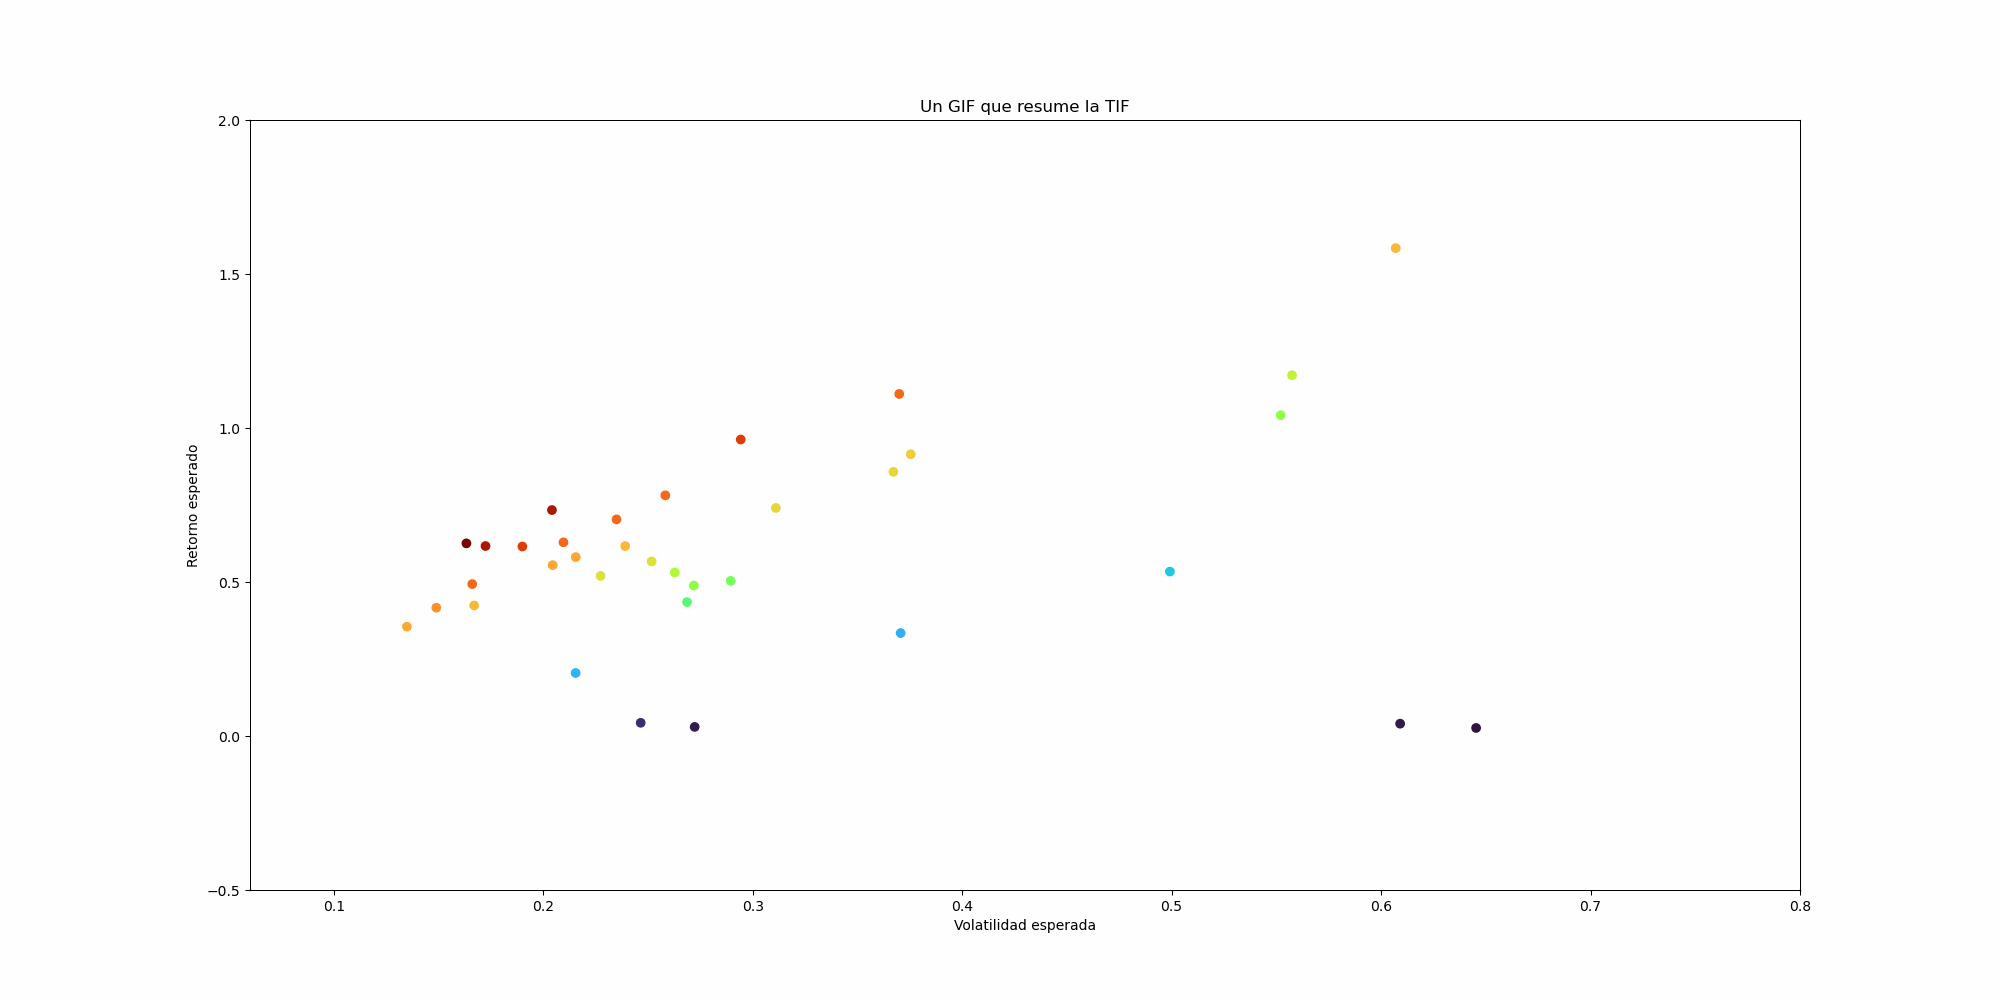

In [ ]:
lista_cambio_retornos = [retorno_optimo_tradicionales,retorno_optimo_mixto_OP]
lista_cambio_riesgos = [desvios_optimos_tradicionales,desvios_optimos_mixto_OP]

frames_intermedios = 30
imagenes = []

for i in range(len(lista_cambio_retornos) - 1):

    retorno_inicio = np.array(lista_cambio_retornos[i])
    retorno_fin = np.array(lista_cambio_retornos[i + 1])
    riesgo_inicio = np.array(lista_cambio_riesgos[i])
    riesgo_fin = np.array(lista_cambio_riesgos[i + 1])

    for j in range(frames_intermedios + 1):
        alpha = j / frames_intermedios
        retorno_interpolado = (1 - alpha) * retorno_inicio + alpha * retorno_fin
        riesgo_interpolado = (1 - alpha) * riesgo_inicio + alpha * riesgo_fin


        plt.figure(figsize=(20, 10))
        plt.scatter(
            riesgo_interpolado, retorno_interpolado, c=retorno_interpolado / riesgo_interpolado, cmap='turbo')
        plt.xlabel('Volatilidad esperada')
        plt.ylim(-0.5, 2)
        plt.xlim(0.06, 0.8)
        plt.ylabel('Retorno esperado')
        plt.title("Un GIF que resume la TIF")

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        plt.close()
        buf.seek(0)
        imagenes.append(imageio.imread(buf))

gif_bytes = io.BytesIO()
imageio.mimsave(gif_bytes, imagenes, format='GIF', duration=300, loop = 5)  
gif_bytes.seek(0)

# Mostrar el GIF en el notebook
display(Image(data=gif_bytes.read(), format='gif'))


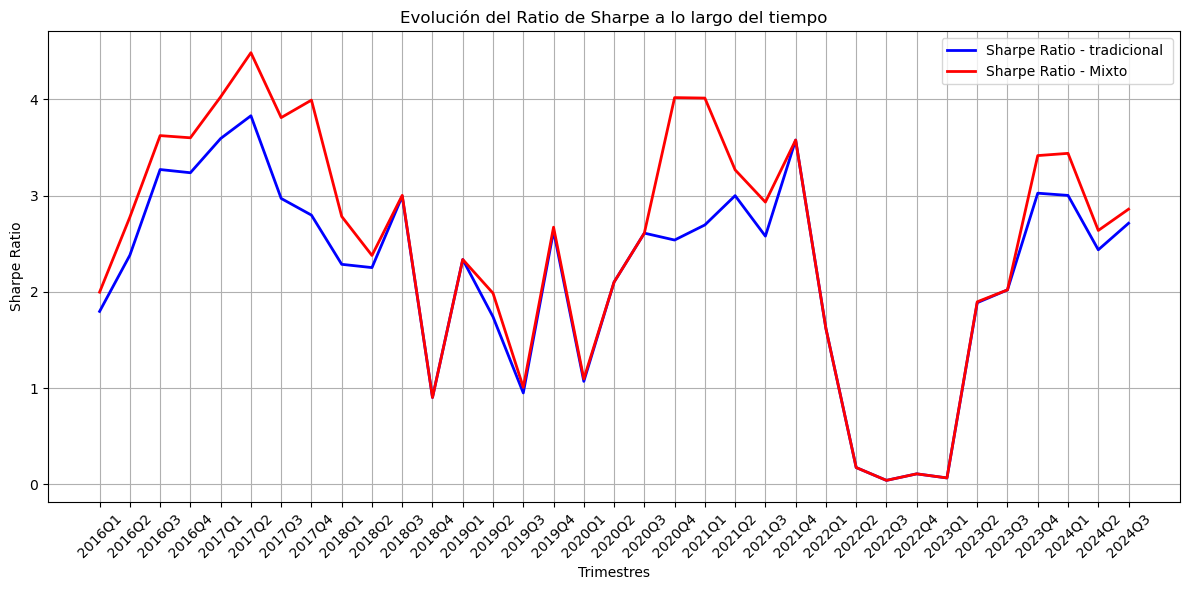

In [ ]:
# Graficar la evolución del ratio de Sharpe (epistemologia (falta de información de datos historicos))
plt.figure(figsize=(12, 6))
plt.plot(trimestres_totales[4:], sharpe_optimo_tradicionales, label='Sharpe Ratio - tradicional ', color='blue', linestyle='-', linewidth=2)
plt.plot(trimestres_totales[4:], sharpe_optimo_mixto, label='Sharpe Ratio - Mixto ', color='red', linestyle='-', linewidth=2)
plt.title('Evolución del Ratio de Sharpe a lo largo del tiempo')
plt.xlabel('Trimestres')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()  # Ajustar el gráfico
plt.show()

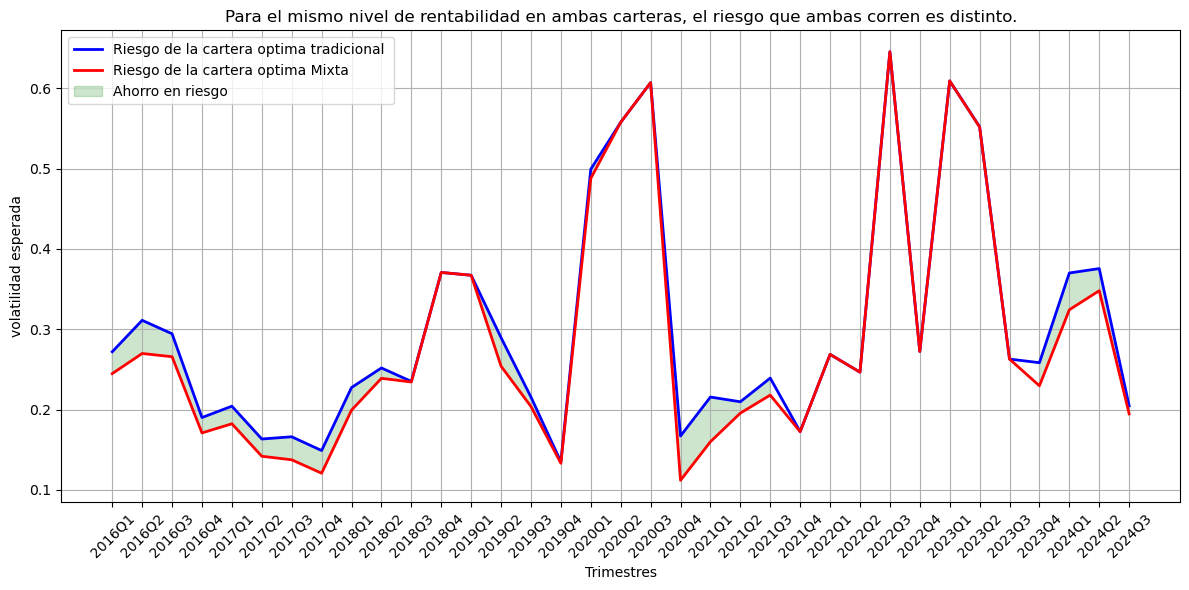

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(trimestres_totales[4:], desvios_optimos_tradicionales, label='Riesgo de la cartera optima tradicional ', color='blue', linestyle='-', linewidth=2)
plt.plot(trimestres_totales[4:], desvios_optimos_mixto_OP, label='Riesgo de la cartera optima Mixta ', color='red', linestyle='-', linewidth=2)
plt.fill_between(trimestres_totales[4:],desvios_optimos_tradicionales, desvios_optimos_mixto_OP, where = (np.array(desvios_optimos_tradicionales) > np.array(desvios_optimos_mixto_OP)) , color = 'green', alpha = 0.2, label = "Ahorro en riesgo")
plt.title('Para el mismo nivel de rentabilidad en ambas carteras, el riesgo que ambas corren es distinto.')
plt.xlabel('Trimestres')
plt.ylabel('volatilidad esperada')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()  # Ajustar el gráfico
plt.show()

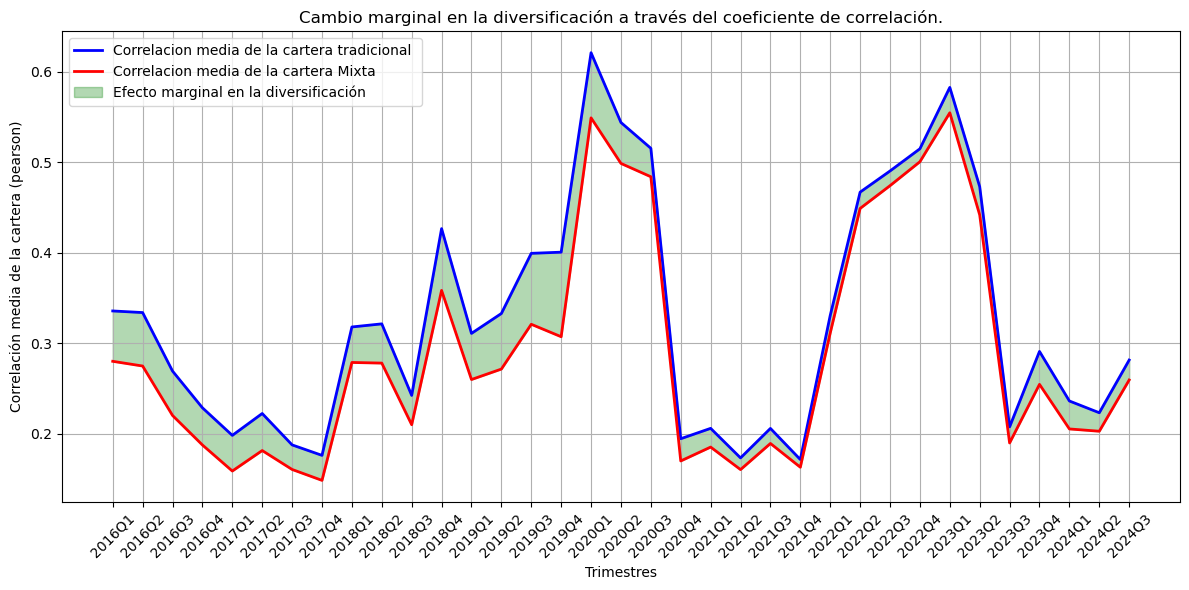

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(trimestres_totales[4:], correlaciones_tradicionales, label='Correlacion media de la cartera tradicional ', color='blue', linestyle='-', linewidth=2)
plt.plot(trimestres_totales[4:], correlacion_mixtos, label='Correlacion media de la cartera Mixta ', color='red', linestyle='-', linewidth=2)
plt.fill_between(trimestres_totales[4:],correlaciones_tradicionales, correlacion_mixtos, where = (np.array(correlaciones_tradicionales) > np.array(correlacion_mixtos)) , color = 'green', alpha = 0.3, label = "Efecto marginal en la diversificación")
plt.title('Cambio marginal en la diversificación a través del coeficiente de correlación.')
plt.xlabel('Trimestres')
plt.ylabel('Correlación media de la cartera (pearson)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()  # Ajustar el gráfico
plt.show()